In [1]:
import torch
from torch import nn
from d2l import torch as d2l

net=nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,10)
)

X=torch.randn(1,1,224,224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [2]:
from torchsummary import summary
summary(net,(1,224,224),batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [1, 96, 54, 54]          11,712
              ReLU-2            [1, 96, 54, 54]               0
         MaxPool2d-3            [1, 96, 26, 26]               0
            Conv2d-4           [1, 256, 26, 26]         614,656
              ReLU-5           [1, 256, 26, 26]               0
         MaxPool2d-6           [1, 256, 12, 12]               0
            Conv2d-7           [1, 384, 12, 12]         885,120
              ReLU-8           [1, 384, 12, 12]               0
            Conv2d-9           [1, 384, 12, 12]       1,327,488
             ReLU-10           [1, 384, 12, 12]               0
           Conv2d-11           [1, 256, 12, 12]         884,992
             ReLU-12           [1, 256, 12, 12]               0
        MaxPool2d-13             [1, 256, 5, 5]               0
          Flatten-14                  [

loss 0.329, train acc 0.880, test acc 0.879
2223.8 examples/sec on cuda:0


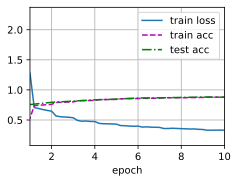

In [3]:
batch_size=128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)
lr,num_epochs=0.01,10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

Exercises

观察不同批量大小对模型精度和GPU显存的影响

batch_size=128

In [4]:
import pynvml

def show_gpu_memory(i=0):
    pynvml.nvmlInit()
    handle=pynvml.nvmlDeviceGetHandleByIndex(i)
    meminfo=pynvml.nvmlDeviceGetMemoryInfo(handle)
    print(f"已使用显存：{meminfo.used/1024**3:.2f} GB")

def init_weights(m):
    if type(m)==nn.Linear or type(m)==nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

show_gpu_memory()
torch.cuda.empty_cache() #释放GPU显存

已使用显存：2.35 GB


batch_size=64

loss 0.273, train acc 0.901, test acc 0.897
2068.7 examples/sec on cuda:0
已使用显存：1.70 GB


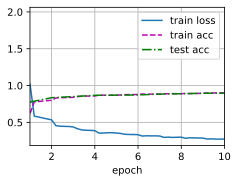

In [5]:
net.apply(init_weights)
batch_size=64
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())
show_gpu_memory()
torch.cuda.empty_cache()

batch_size=512

loss 0.496, train acc 0.815, test acc 0.815
2401.5 examples/sec on cuda:0
已使用显存：5.78 GB


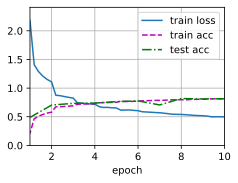

In [6]:
net.apply(init_weights)
batch_size=512
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())
show_gpu_memory()